In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_parquet('noaa_isd_data_SD_2000_to_2020.parquet.gzip')
df['station_id'] = df.usaf_station_id + "-" + df.wban_station_id
df['date'] = pd.to_datetime(df['date'])
print(df.shape)
df.head()

(4581077, 12)


,var_data_len,usaf_station_id,wban_station_id,date,latitude,longitude,report_type,elevation_meters,call_letters,qc_process,air_temp_c,station_id
0,71,722903,99999,2000-01-01 00:00:00,32.817,-117.133,NSRDB,129.0,None,V02,NaN,722903-99999
1,145,722903,99999,2000-01-01 00:53:00,32.820,-117.130,FM-15,129.0,KMYF,V02,12.0,722903-99999
2,71,722903,99999,2000-01-01 01:00:00,32.817,-117.133,NSRDB,129.0,None,V02,NaN,722903-99999
3,213,722903,99999,2000-01-01 01:53:00,32.820,-117.130,FM-15,129.0,KMYF,V02,12.0,722903-99999
4,54,722903,99999,2000-01-01 02:00:00,32.817,-117.133,NSRDB,129.0,None,V02,NaN,722903-99999


In [3]:
df.station_id.value_counts()

999999-53151    1244609
722900-23188     281924
722926-03154     209242
722906-93112     205224
722909-93115     191148
745056-53120     181982
760013-99999     177654
722927-03177     170581
722934-53121     170572
722904-03178     168590
722907-53143     164972
722903-03131     160173
722931-93107     152320
747186-03164     127847
722928-00369     109718
722927-99999     104453
722903-99999     102106
745056-99999     100955
998013-99999      72398
722934-99999      68718
722904-99999      66409
722930-93107      50159
747186-99999      50115
994027-99999      46998
994018-99999      46629
997292-99999      35404
722907-99999      31698
998408-99999      21529
997330-99999      11421
997329-99999      11350
997809-99999      10639
997328-99999       8374
997206-99999       7153
722931-99999       5744
998159-99999       3792
998161-99999       3519
998335-99999       2740
722928-99999       2218
Name: station_id, dtype: int64

In [4]:
df.date.describe(), df.date.max(), df.date.min()

(count                 4581077
 unique                2542987
 top       2012-02-01 07:59:00
 freq                       27
 first     2000-01-01 00:00:00
 last      2020-02-14 07:59:00
 Name: date, dtype: object,
 Timestamp('2020-02-14 07:59:00'),
 Timestamp('2000-01-01 00:00:00'))

In [5]:
mask = df.station_id.isin(df.station_id.value_counts().index[:3])
print(df[mask].shape)
df[mask].head(5)

(1735775, 12)


,var_data_len,usaf_station_id,wban_station_id,date,latitude,longitude,report_type,elevation_meters,call_letters,qc_process,air_temp_c,station_id
58901,518,722926,03154,2000-01-01 00:00:00,33.3,-117.35,FM-15,23.0,NFG,V02,16.7,722926-03154
58902,210,722926,03154,2000-01-01 00:20:00,33.3,-117.35,FM-15,56.0,KNFG,V02,14.0,722926-03154
58903,198,722926,03154,2000-01-01 00:30:00,33.3,-117.35,FM-15,56.0,KNFG,V02,13.0,722926-03154
58904,290,722926,03154,2000-01-01 01:00:00,33.3,-117.35,FM-15,56.0,KNFG,V02,13.0,722926-03154
58905,234,722926,03154,2000-01-01 02:00:00,33.3,-117.35,FM-15,56.0,KNFG,V02,11.0,722926-03154


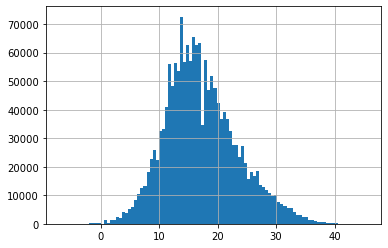

In [7]:
df[mask].air_temp_c.hist(bins=100);

C:\Users\Mike\AppData\Local\Continuum\anaconda3\envs\geo\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


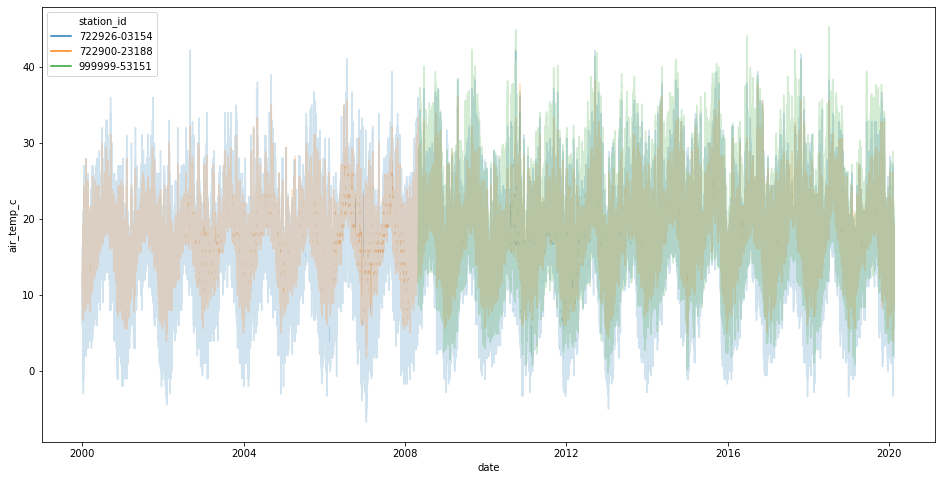

In [8]:
fig_dims = (16, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(data=df[mask],
             sort=True,
             alpha=0.2,
             x='date',
             y='air_temp_c',
             hue='station_id',
             ax=ax)